In [1]:
library(PepsNMR)
library(devtools)
library(knitr)

Loading required package: usethis



In [2]:
# ==== set graphical parameters =================
# select the index of the spectrum that will be drawn
spectrIndex <- 1
# colors
col1 <-  "gray18"
col2 <- "firebrick1"

In [3]:
sample_dir <- scan("/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374/input/nmr/sample_list.txt",
                   what="", sep="\n")

In [4]:
path_to_fid <- "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374/input/nmr"
fidList <- ReadFids(file.path(path_to_fid, sample_dir), verbose=TRUE)
Fid_data <- fidList[["Fid_data"]]
Fid_info <- fidList[["Fid_info"]]
kable(head(Fid_info))
#write.csv(Fid_data, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374_unzip_test/output/PepsNMR_output/Fid_data.csv")
#write.csv(Fid_info, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374_unzip_test/output/PepsNMR_output/Fid_info.csv")

Begin ReadFids 


Warning message in if (file.exists(path) == FALSE) {:
"the condition has length > 1 and only the first element will be used"


dim Fid_data:  182 49152 
IDs:  1 10 100 101 102 103 104 105 106 107 108 109 11 110 111 112 113 114 115 116 117 118 119 12 120 121 122 123 124 125 126 127 128 129 13 130 131 132 133 134 135 136 137 138 139 14 140 141 142 143 144 145 146 147 148 149 15 150 151 152 153 154 155 156 157 158 159 16 160 161 162 163 164 165 166 167 168 169 17 170 171 172 173 174 175 176 177 178 179 18 180 181 182 19 2 20 21 22 23 24 25 26 27 28 29 3 30 31 32 33 34 35 36 37 38 39 4 40 41 42 43 44 45 46 47 48 49 5 50 51 52 53 54 55 56 57 58 59 6 60 61 62 63 64 65 66 67 68 69 7 70 71 72 73 74 75 76 77 78 79 8 80 81 82 83 84 85 86 87 88 89 9 90 91 92 93 94 95 96 97 98 99 
non-unique IDs? 0 
End ReadFids 
It lasted 1.361 s user time, 0.602 s system time and 3.887 s elapsed time.




|    |    TD| BYTORDA| DIGMOD|    DECIM| DSPFVS|     SW_h|       SW|     O1| GRPDLY|       DT|
|:---|-----:|-------:|------:|--------:|------:|--------:|--------:|------:|------:|--------:|
|1   | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|
|10  | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|
|100 | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|
|101 | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|
|102 | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|
|103 | 98304|       0|      3| 1109.333|     21| 18028.85| 30.01842| 2823.7|     76| 2.77e-05|

In [5]:
ncol(Fid_data)

[1] 49152

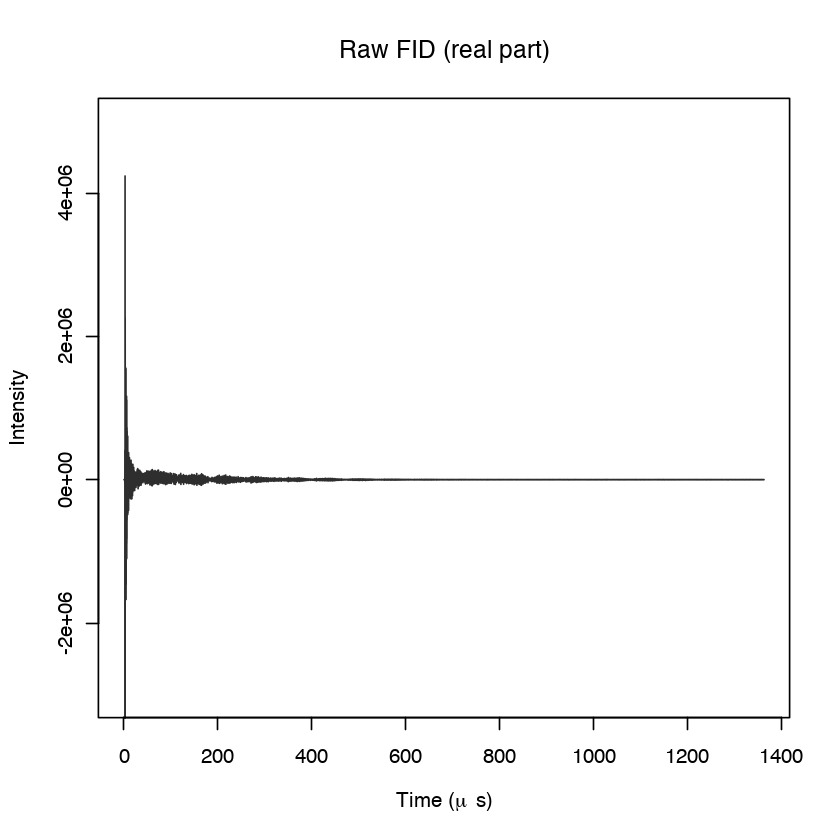

In [6]:
# Visualize raw fid
time <- as.numeric(colnames(Fid_data))*1000
plot(time, Re(Fid_data[spectrIndex,]),type="l", col = col1, xlab=
       expression(paste("Time (", mu,"s)")), ylab = "Intensity", 
     main = "Raw FID (real part)", ylim = c(-3e6,5e6))

In [7]:
# ==== GroupDelayCorrection =================
Fid_data.GDC <- GroupDelayCorrection(Fid_data, Fid_info, verbose =TRUE)

Begin GroupDelayCorrection 
End GroupDelayCorrection 
It lasted 2.262 s user time, 0.458 s system time and 2.743 s elapsed time.


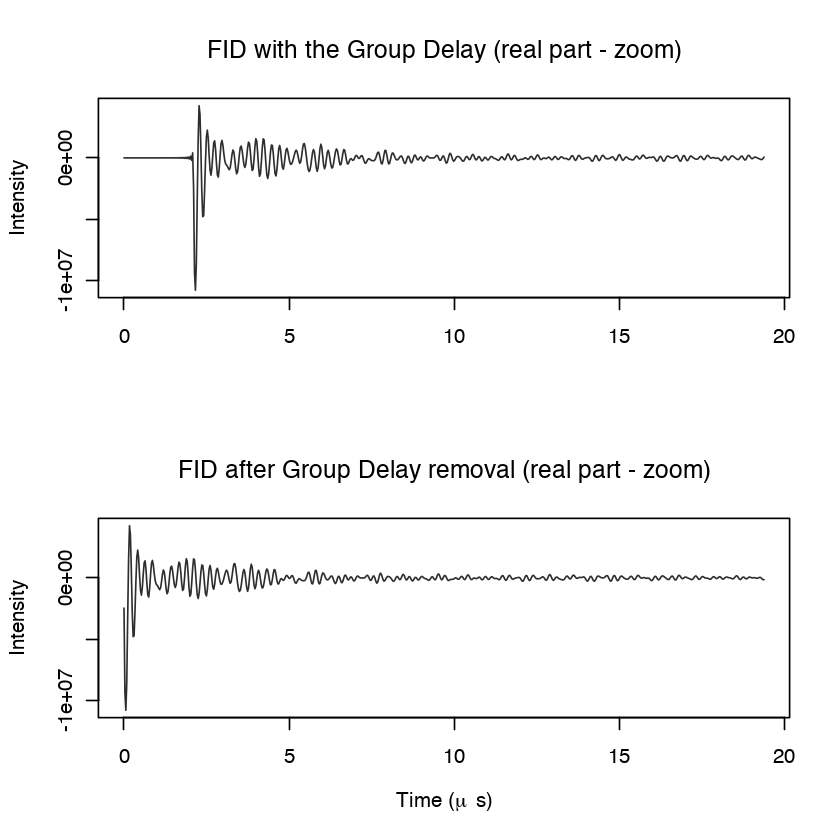

In [8]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:700], Re(Fid_data[spectrIndex,0:700]),  
     type = "l", ylab = "Intensity", xlab="", 
     main = "FID with the Group Delay (real part - zoom)", col = col1)
plot(time[0:700], Re(Fid_data.GDC[spectrIndex,0:700]), 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Group Delay removal (real part - zoom)", col = col1)

In [9]:
# ====  SolventSuppression =================
SS.res <- SolventSuppression(Fid_data.GDC, returnSolvent=TRUE)
Fid_data.SS <- SS.res[["Fid_data"]]
SolventRe <- SS.res[["SolventRe"]]

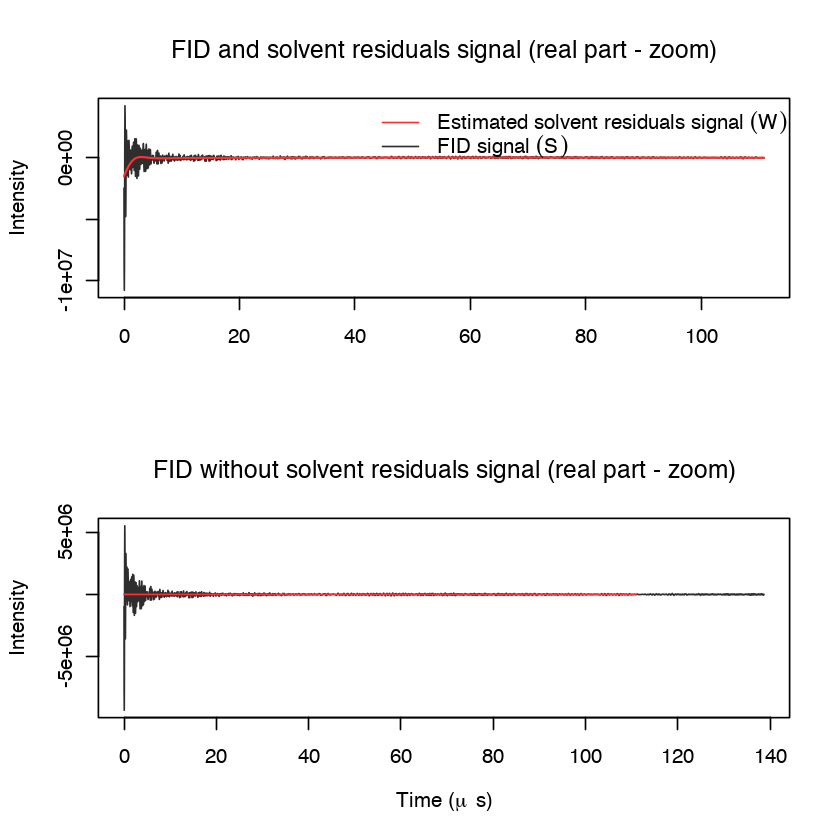

In [10]:
# Visualize changes
par(mfrow=c(2,1))
plot(time[0:4000], Re(Fid_data.GDC[spectrIndex,0:4000]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", 
     main="FID and solvent residuals signal (real part - zoom)")
lines(time[0:4000],SolventRe[spectrIndex,0:4000], col=col2 , lwd = 1.3)
legend("topright", bty = "n", legend = c(expression(paste("Estimated solvent residuals signal ", (italic(W)))), expression(paste("FID signal ", (italic(S))))), 
       col=c(col2, col1),  lty = 1)
plot(time[0:5000], Re(Fid_data.SS[1,0:5000]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID without solvent residuals signal (real part - zoom)")
lines(time[0:4000], rep(0, 4000), col=col2)

In [11]:
# ==== Apodization =================
Fid_data.A <- Apodization(Fid_data.SS, Fid_info)

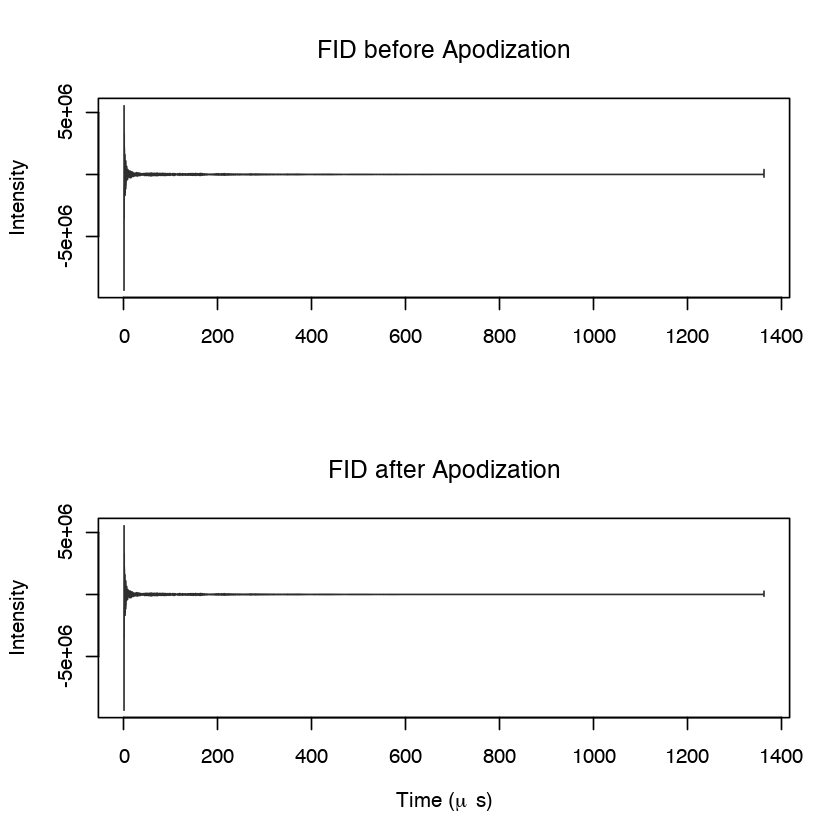

In [12]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.SS[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Apodization")
plot(time, Re(Fid_data.A[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Apodization")

In [13]:
# ==== Zero Filling =================
Fid_data.ZF <- ZeroFilling(Fid_data.A, fn = ncol(Fid_data.A))

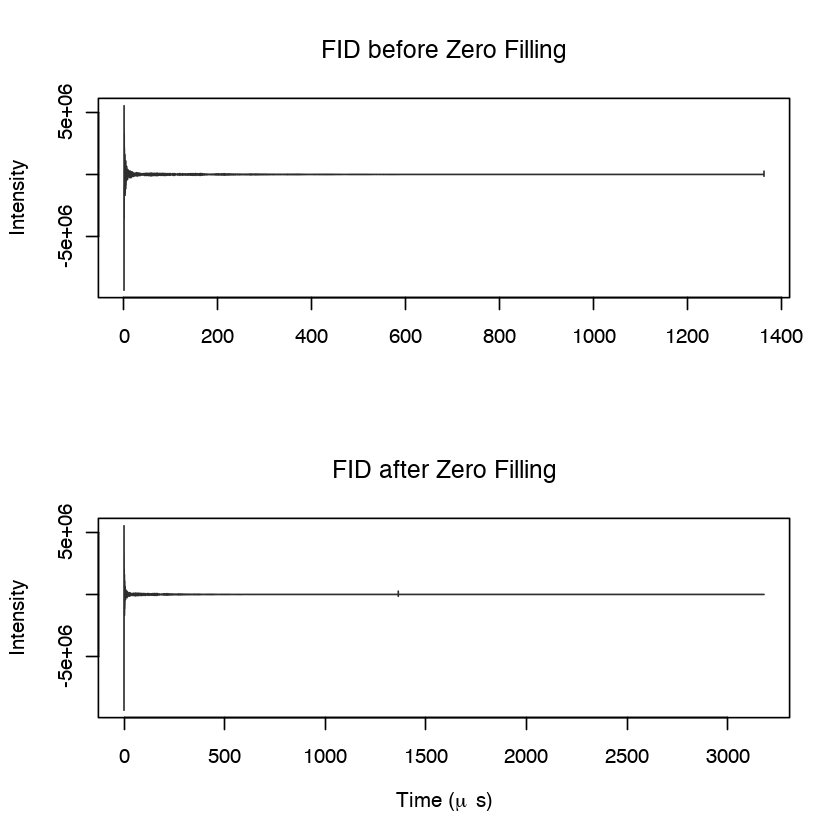

In [14]:
# Visualize changes
par(mfrow=c(2,1))
plot(time, Re(Fid_data.A[spectrIndex,]),  col=col1, 
     type="l", ylab = "Intensity", xlab="", main="FID before Zero Filling")
time <- as.numeric(colnames(Fid_data.ZF))*1000
plot(time, Re(Fid_data.ZF[spectrIndex,]), col=col1, 
     type="l", ylab = "Intensity", xlab=expression(paste("Time (", mu,"s)")), 
     main="FID after Zero Filling")

In [15]:
# ==== FourierTransform =================
RawSpect_data.FT <- FourierTransform(Fid_data.ZF, Fid_info)

In [16]:
names(RawSpect_data.FT)
dim(RawSpect_data.FT)

NULL

[1]    182 114688

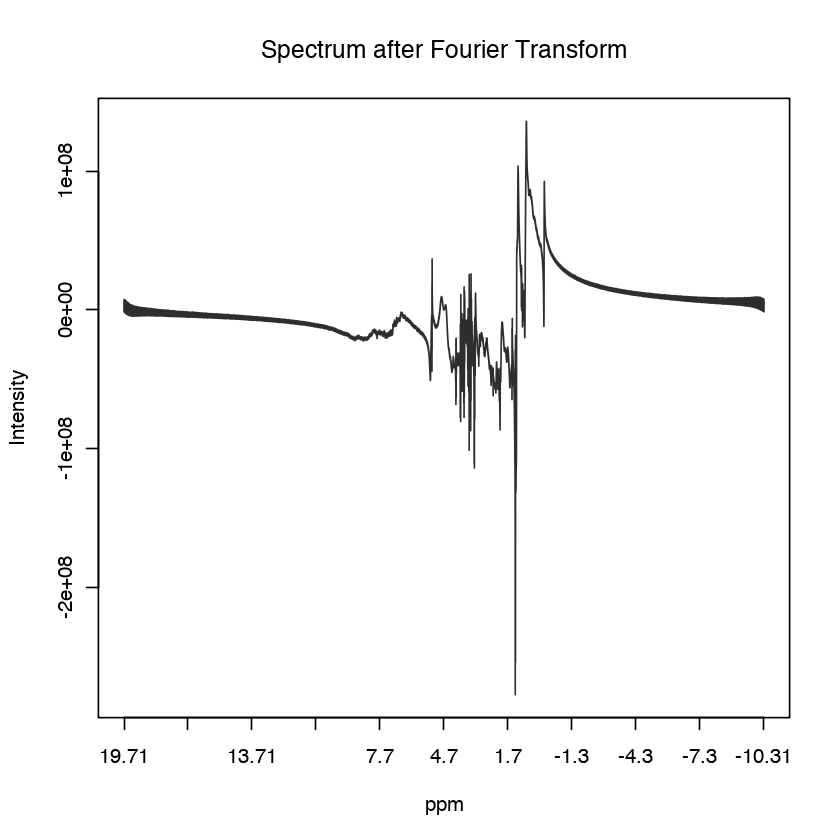

In [17]:
# Visualize Changes
plot(Re(RawSpect_data.FT[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Fourier Transform")
at <- seq(1,dim(RawSpect_data.FT)[2], floor(dim(RawSpect_data.FT)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(RawSpect_data.FT)[at]),2))

In [18]:
# ==== ZeroOrderPhaseCorrection =================
Spectrum_data.ZOPC <- ZeroOrderPhaseCorrection(RawSpect_data.FT)

In [19]:
names(Spectrum_data.ZOPC)
dim(Spectrum_data.ZOPC)

NULL

[1]    182 114688

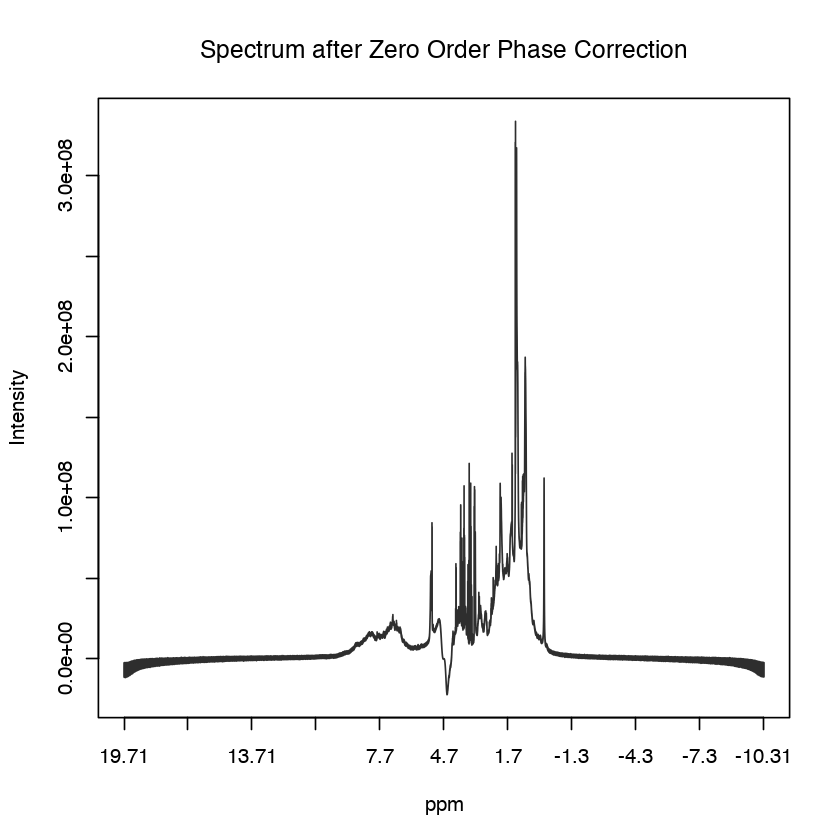

In [20]:
# Visualize Changes
plot(Re(Spectrum_data.ZOPC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Zero Order Phase Correction")
at <- seq(1,dim(Spectrum_data.ZOPC)[2], floor(dim(Spectrum_data.ZOPC)[2]/10))
axis(side=1, at = at, 
     labels = round(as.numeric(colnames(Spectrum_data.ZOPC)[at]),2))

[[1]]


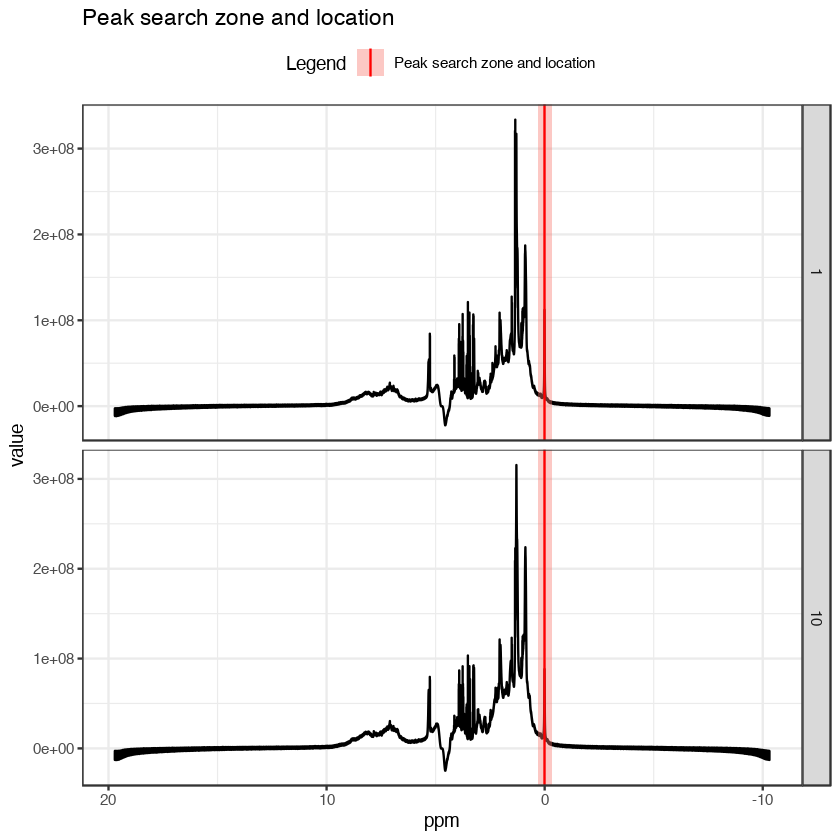

In [21]:
# ==== InternalReferencing =================
target.value <- 0
IR.res <- InternalReferencing(Spectrum_data.ZOPC, Fid_info,
                                        ppm.value = target.value,
                                        rowindex_graph = c(1,2))
IR.res$plots
Spectrum_data.IR <- IR.res$Spectrum_data

In [22]:
names(IR.res)
dim(IR.res)

[1] "Spectrum_data" "plots"

NULL

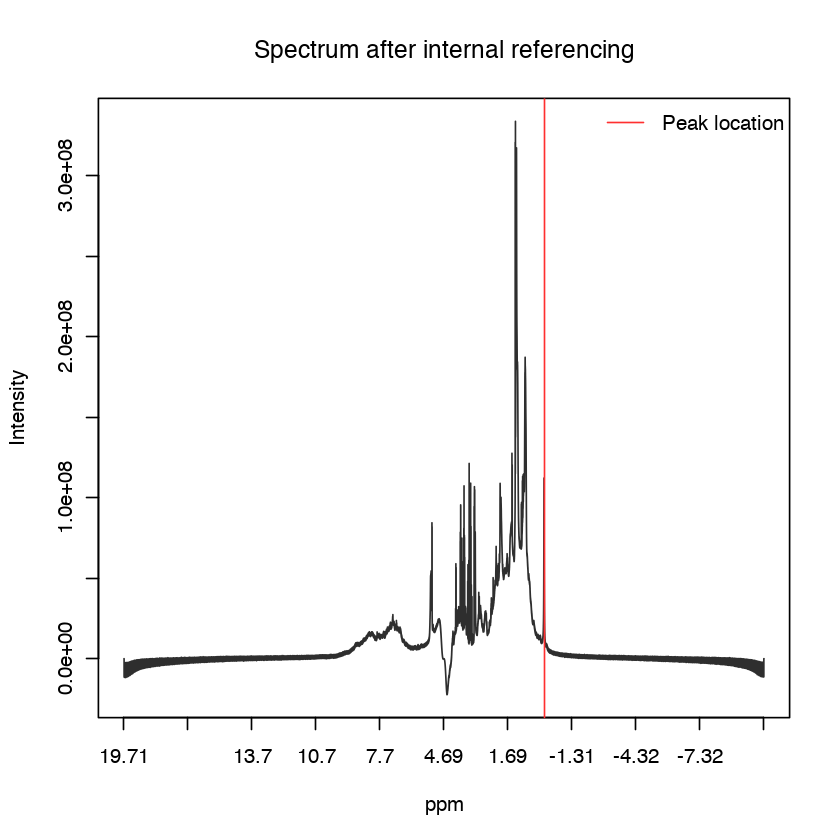

In [23]:
# Visualize changes
ppmvalues <- as.numeric(colnames(Spectrum_data.IR))
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after internal referencing")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, 
     labels = round(ppmvalues[at],2))
index <- which(abs(ppmvalues-target.value) == min(abs(ppmvalues-target.value)))
abline(v = index, col= col2)
legend("topright", bty = "n", legend = "Peak location", 
       col=col2,  lty = 1)

In [24]:
# ==== BaselineCorrection =================
BC.res <- BaselineCorrection(Spectrum_data.IR, returnBaseline = TRUE,
                             lambda.bc = 1e8, p.bc = 0.01)

In [25]:
names(BC.res)
dim(BC.res)

[1] "Spectrum_data" "Baseline"

NULL

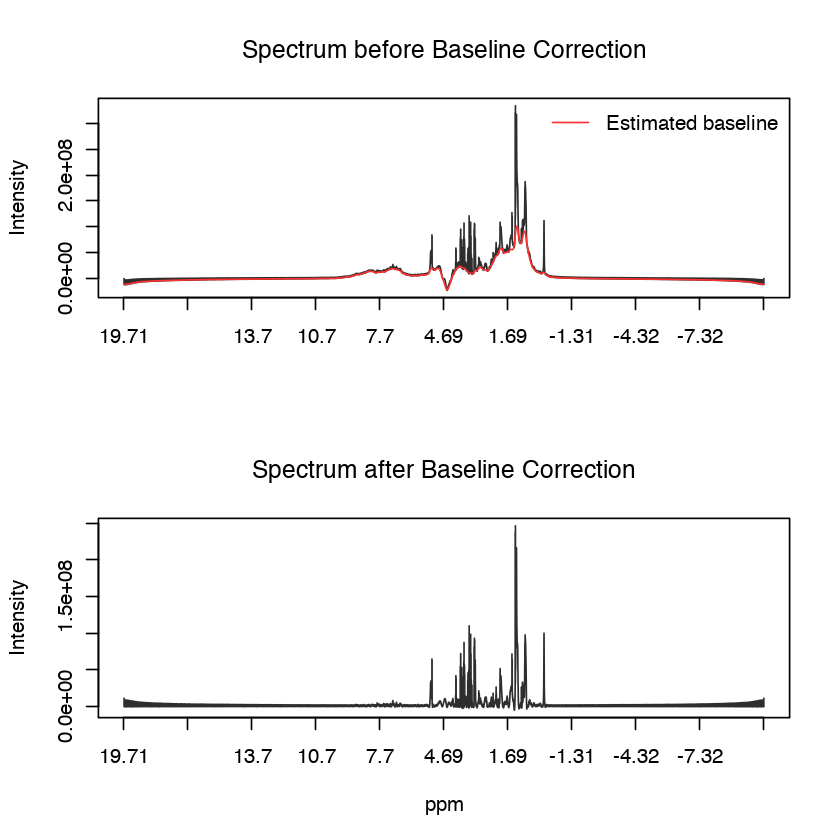

In [26]:
# visualize changes
par(mfrow=c(2,1))
Spectrum_data.BC <- BC.res[["Spectrum_data"]] 
Baseline <- BC.res[["Baseline"]]
plot(Re(Spectrum_data.IR[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "", 
     main="Spectrum before Baseline Correction")
at <- seq(1,dim(Spectrum_data.IR)[2], floor(dim(Spectrum_data.IR)[2]/10))
axis(side=1, at = at, labels = round(ppmvalues[at],2))
lines(Baseline[,1], col=col2)
legend("topright", bty = "n", legend = "Estimated baseline ", 
       col = col2,  lty = 1)
plot(Re(Spectrum_data.BC[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Baseline Correction")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [27]:
# ==== NegativeValuesZeroing =================
Spectrum_data.NVZ <- NegativeValuesZeroing(Spectrum_data.BC)

In [28]:
names(Spectrum_data.NVZ)
dim(Spectrum_data.NVZ)

NULL

[1]    182 114732

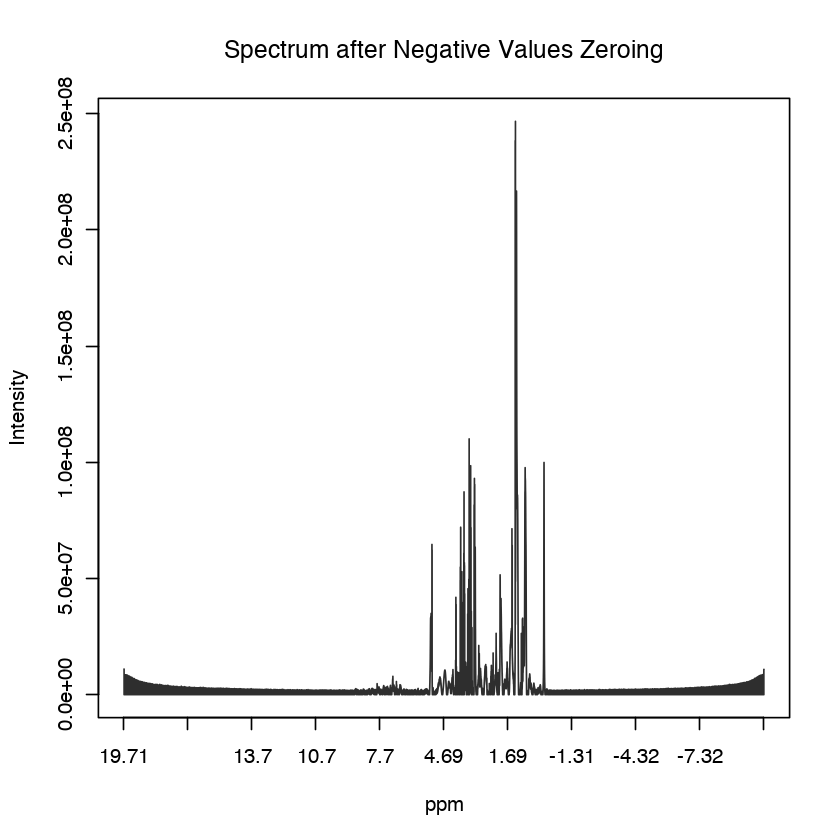

In [29]:
# visualize
plot(Re(Spectrum_data.NVZ[spectrIndex,]), col=col1, xaxt="n",
     type="l", ylab = "Intensity", xlab = "ppm", 
     main="Spectrum after Negative Values Zeroing")
axis(side=1, at = at, labels = round(ppmvalues[at],2))

In [30]:
# ==== Warping =================
W.res <- Warping(Spectrum_data.NVZ, returnWarpFunc = TRUE, 
                 reference.choice = "fixed", verbose = TRUE)

Begin Warping 
End Warping 
It lasted 1171.236 s user time, 185.014 s system time and 1365.606 s elapsed time.


In [31]:
#write.csv(W.res, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS395/output/PepsNMR_output/Wres.csv")
options(error=recover)
names(W.res)

[1] "Spectrum_data" "Warp.func"

In [32]:
Spectrum_data.W <- W.res[["Spectrum_data"]]
warp_func <- W.res[["Warp.func"]]

In [33]:
par(mfrow=c(2,1))
f <- c(21, 20, 24) # warped spectra index to draw
fen <- c(35560:36480) # x-window
ylim <- c(0, max(c(Re(Spectrum_data.NVZ[c(1, f),fen]), Re(Spectrum_data.W[c(spectrIndex, f),fen]))))

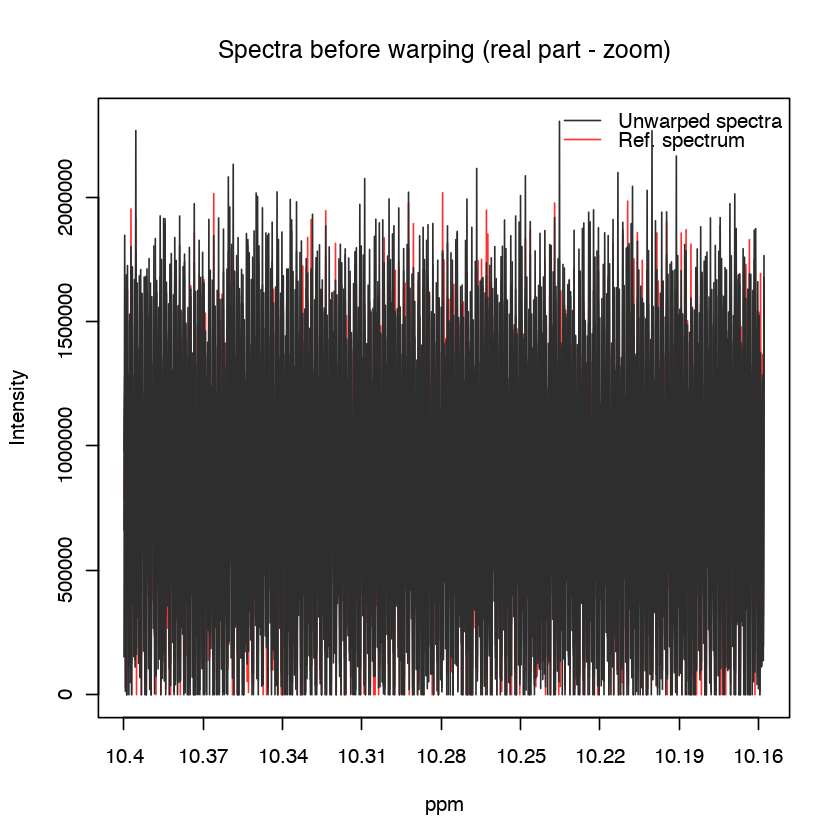

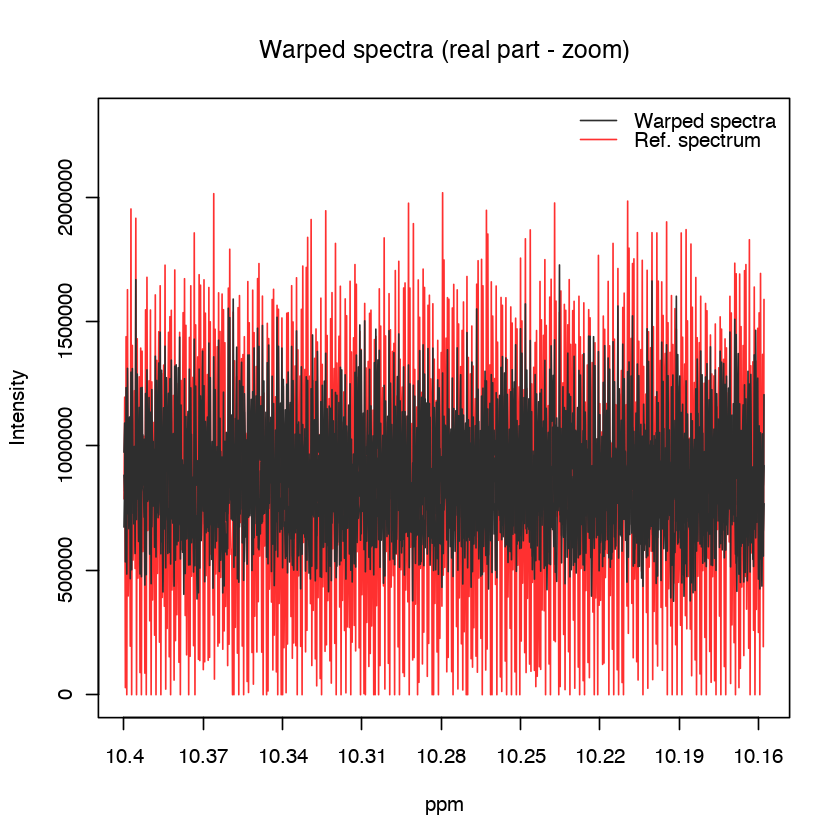

In [34]:
# Unwarped spectra
plot(Re(Spectrum_data.NVZ[1, fen]),   xaxt = "n", col=col2, ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Spectra before warping (real part - zoom)")
legend("topright", bty = "n", y.intersp = 0.8,legend=c("Unwarped spectra","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.NVZ[j,fen]), col=col1, type="l")
  }
# Warped spectra
plot(Re(Spectrum_data.W[1, fen]), col=col2, xaxt = "n",ylab = "Intensity",ylim=ylim, type="l", xlab="ppm", main="Warped spectra (real part - zoom)")
legend("topright",   bty = "n",  y.intersp = 0.8, legend=c("Warped spectra ","Ref. spectrum "), lty = c(1,1), col=c(col1,col2))    
axis(side=1,  at = seq(1,length(fen), 114), labels = round(as.numeric(colnames(Spectrum_data.NVZ[,fen])[seq(1,length(fen), 114)]),2))
for (j in f) {
  graphics::lines(Re(Spectrum_data.W[j,fen]), col=col1, type="l")
  }

In [35]:
# ==== WindowSelection =================
Spectrum_data.WS <- WindowSelection(Spectrum_data.W, from.ws = 10, 
                                    to.ws = 0)

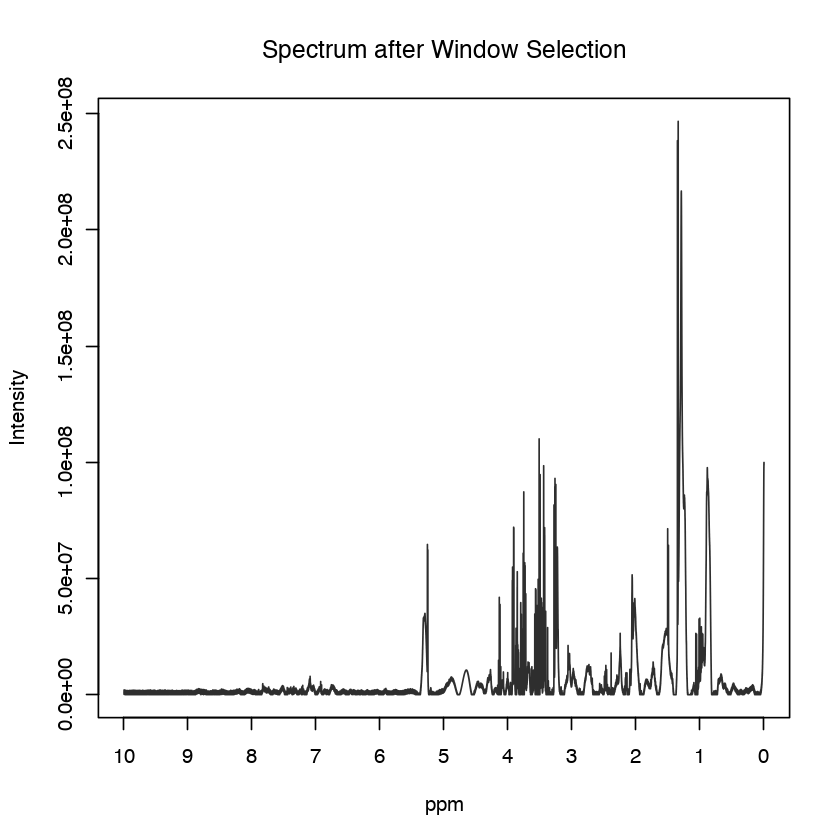

In [36]:
# visualize
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Window Selection")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [37]:
# ==== Bucketing =================
# by defualt this function divides by the number of bins/buckets the user wants
# the default value is 500 bins/buckets. the spectra span from 0.2 to 10 ppm
# which means that each bin/bucket is 0.0196 ppm in width.
Spectrum_data.B <- Bucketing(Spectrum_data.WS, mb = 5000, intmeth = "t")
#write.csv(Spectrum_data.B, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374_unzip_test/output/PepsNMR_output/MTBLS374_PepsNMR_bin_testonly.csv")

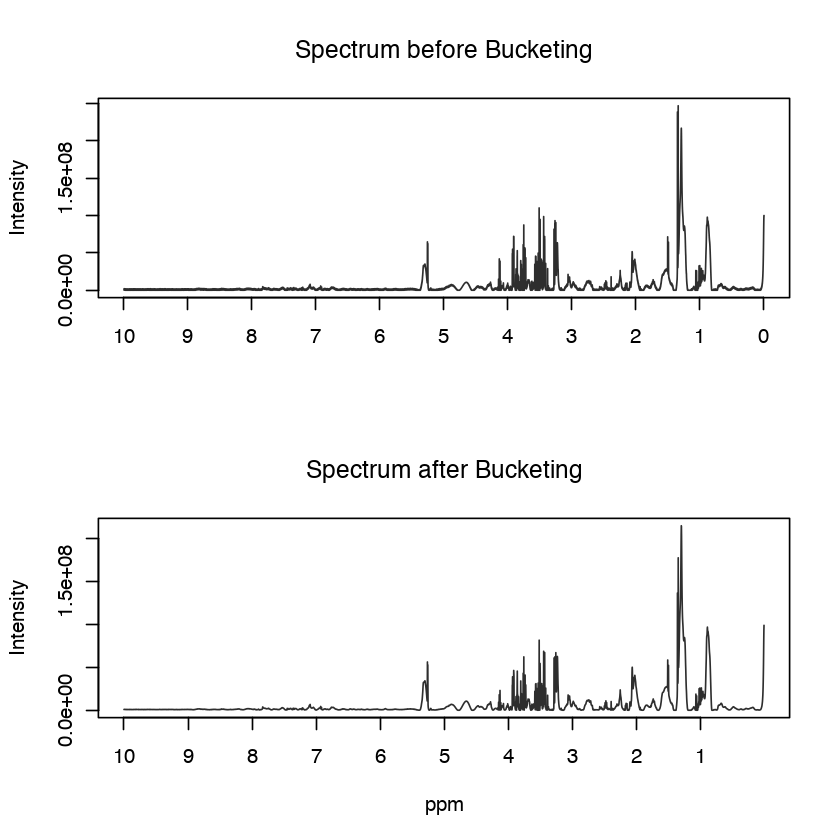

In [38]:
# visualize
par(mfrow=c(2,1))
at <- seq(1,dim(Spectrum_data.WS)[2], floor(dim(Spectrum_data.WS)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.WS))
plot(Re(Spectrum_data.WS[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "", 
     main = "Spectrum before Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
at <- seq(1,dim(Spectrum_data.B)[2], floor(dim(Spectrum_data.B)[2]/10))
ppmvalues <- as.numeric(colnames(Spectrum_data.B))
plot(Re(Spectrum_data.B[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Bucketing")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [39]:
# ==== RegionRemoval =================
# "The type of spectra can be NULL to manually specify the area to be removed otherwise it is
#specified as typeofspectra = "serum" or typeofspectra = "urine" and the removed area are for
#typeofspectra = "serum": water (4.5 - 5.1 ppm) and for typeofspectra = "urine": water, uree [sic]
# and maleic acid (4.5 - 6.1 ppm)."
Spectrum_data.RR <- RegionRemoval(Spectrum_data.WS, 
                                  typeofspectra = "serum")

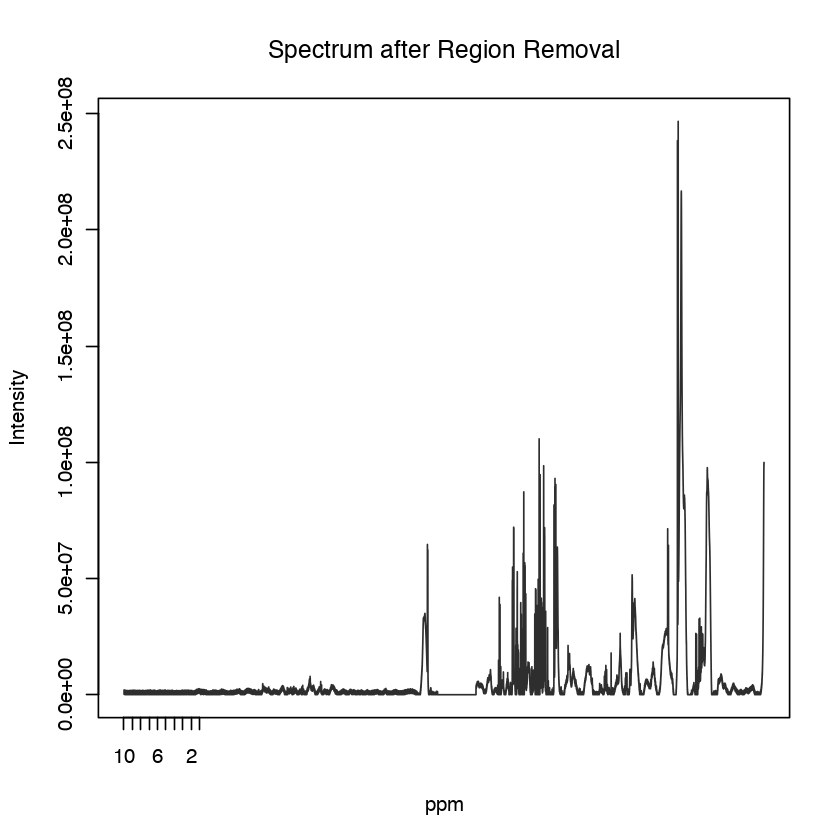

In [40]:
# visualize
plot(Re(Spectrum_data.RR[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Region Removal")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))

In [41]:
# ==== Normalization =================
Spectrum_data.N <- Normalization(Spectrum_data.RR, type.norm = "mean")
# renaming "Spectrum_data.N" to "data" to export data
# writing final output to csv


In [45]:
write.csv(Spectrum_data.N, file = "/Users/morris/Box/Hall_Lab/Projects/MTBLS_explore/MTBLS374/output/PepsNMR_output/MTBLS374_PepsNMR_preprocessed_bin0.0002_02142020.csv")

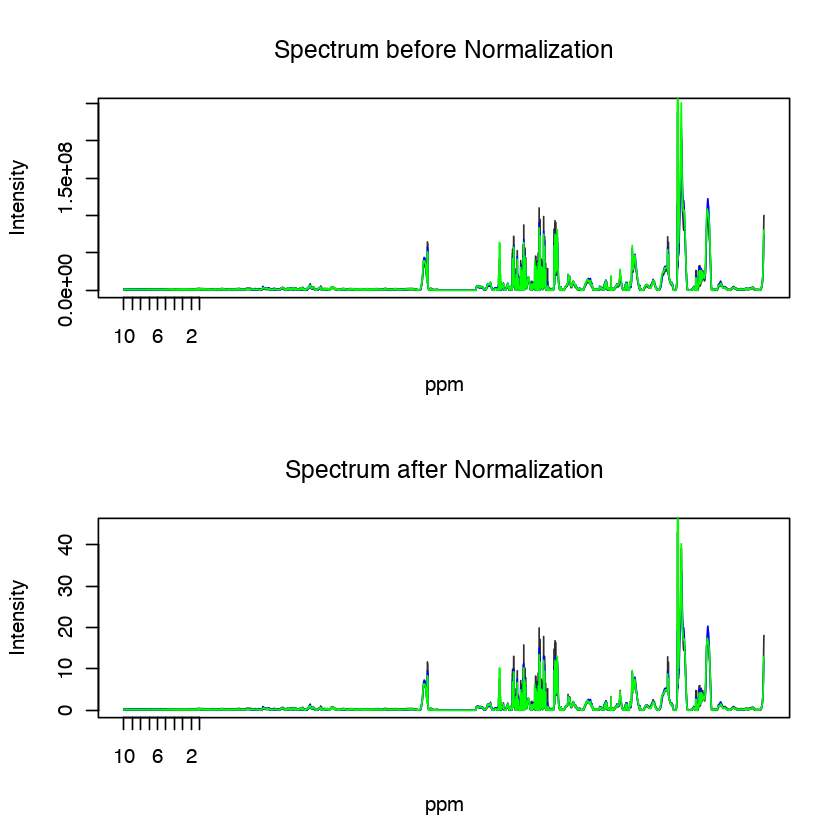

In [43]:
par(mfrow=c(2,1))
plot(Re(Spectrum_data.RR[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum before Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.RR[2,]), col = "blue")
lines(Re(Spectrum_data.RR[3,]), col = "green")
plot(Re(Spectrum_data.N[spectrIndex,]), col = col1, xaxt = "n",
     type = "l", ylab = "Intensity", xlab = "ppm", 
     main = "Spectrum after Normalization")
axis(side = 1, at = at, labels = round(ppmvalues[at],2))
lines(Re(Spectrum_data.N[2,]), col = "blue")
lines(Re(Spectrum_data.N[3,]), col = "green")

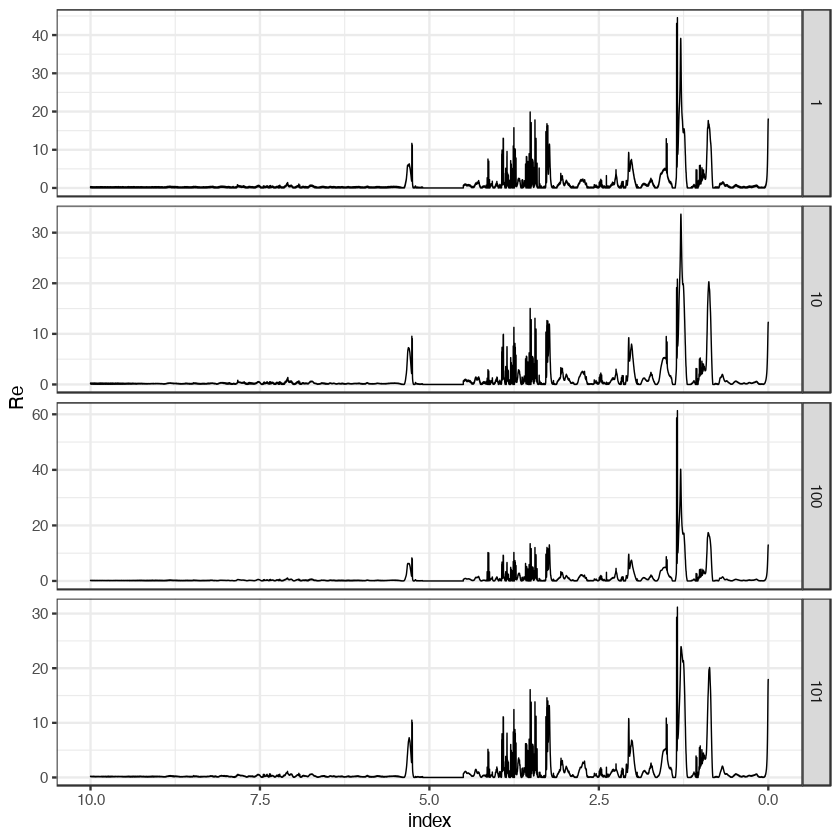

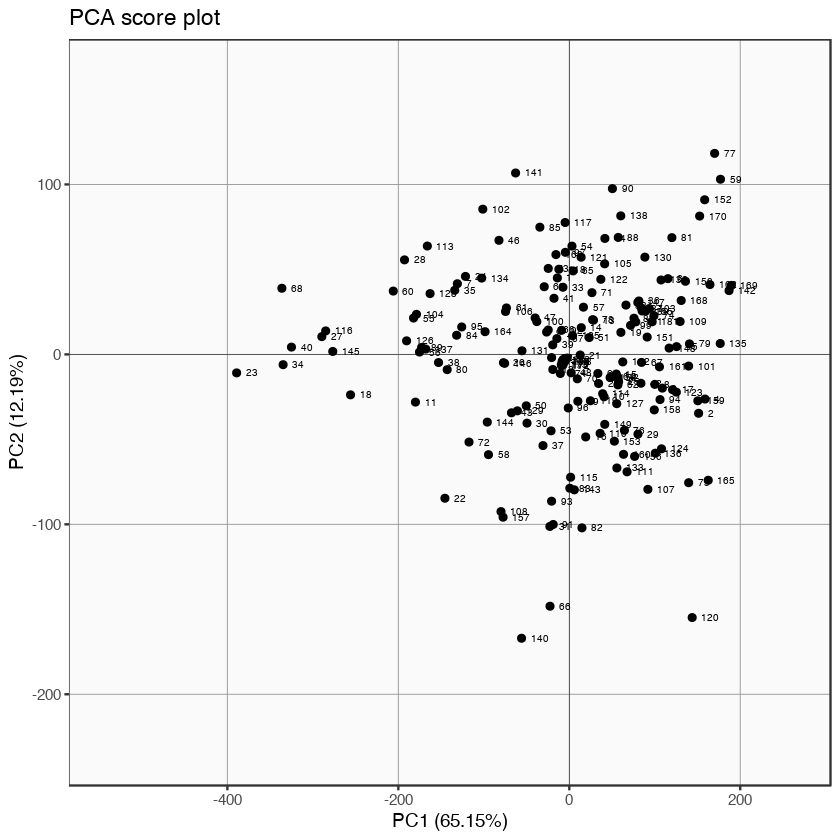

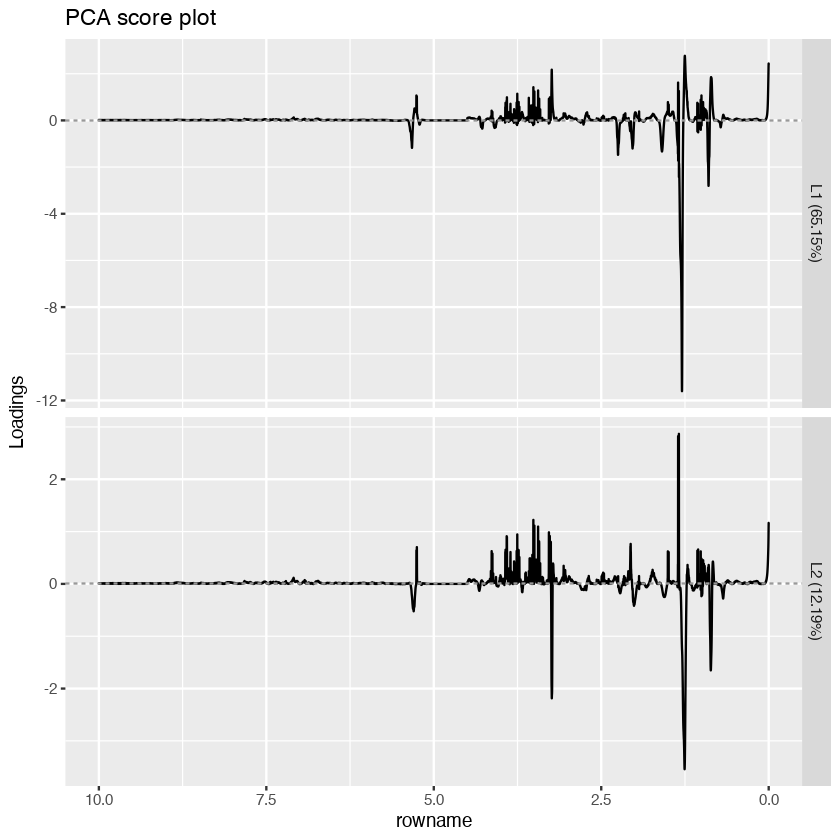

In [44]:
# ==== Drawing PCA ====
# Left class as blank
Draw(Spectrum_data.N[1:4,], type.draw = c("signal"), 
     subtype= "stacked", output = c("default"))
# Left class as blank
Draw(Spectrum_data.N, type.draw = c("pca"), 
     output = c("default"), 
     type.pca = "scores", height = 960, width = 1280)

Draw(Spectrum_data.N, type.draw = c("pca"), 
     output = c("default"),
     type.pca = "loadings")